<a href="https://colab.research.google.com/github/anvastol/hw_mlops_1/blob/main/MLOps_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


## Загрузка данных

In [4]:
data = pd.read_csv('/Credit_Default.csv')
print(data.head())

        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1


## Анализ пропущенных значений


In [5]:
#Подсчет пропущенных значений
missing_values = data.isnull().sum()

In [6]:
#Создание таблицы пропущенных значений
missing_values_table = pd.DataFrame({
    'column': missing_values.index,
    'missing_count': missing_values.values,
    'missing_percentage': (missing_values.values / len(data)) * 100
})
print(missing_values_table)

           column  missing_count  missing_percentage
0          Income              0                 0.0
1             Age              0                 0.0
2            Loan              0                 0.0
3  Loan to Income              0                 0.0
4         Default              0                 0.0


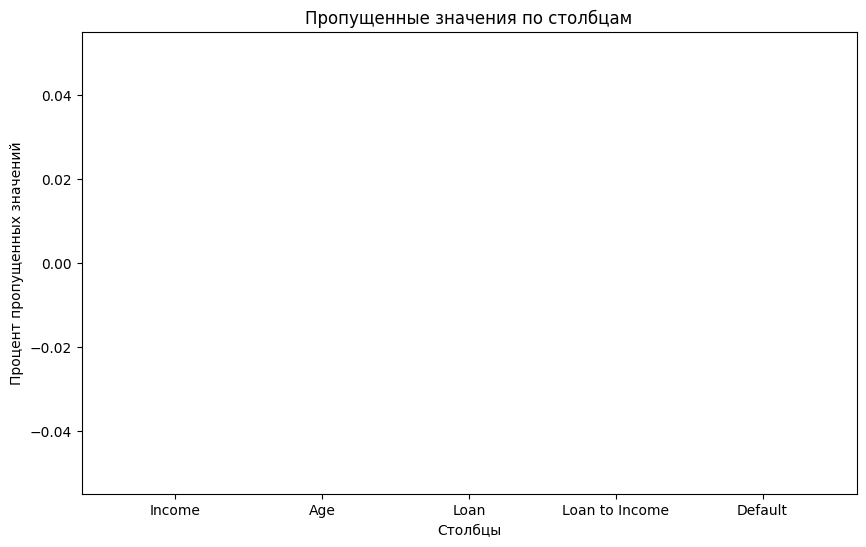

In [8]:
# Бар-чарт
plt.figure(figsize=(10, 6))
plt.bar(missing_values_table['column'], missing_values_table['missing_percentage'])
plt.xlabel('Столбцы')
plt.ylabel('Процент пропущенных значений')
plt.title('Пропущенные значения по столбцам')
plt.show()

# Круговая диаграмма, если есть пропущенные значения
if missing_values_table['missing_count'].sum() > 0:
    plt.figure(figsize=(8, 8))
    plt.pie(missing_values_table['missing_percentage'], labels=missing_values_table['column'], autopct='%1.1f%%')
    plt.title('Процент пропущенных значений по столбцам')
    plt.show()

Судя по результату, пропущенные значения отсутствуют.

## Построение диаграмм попарного распределения признаков

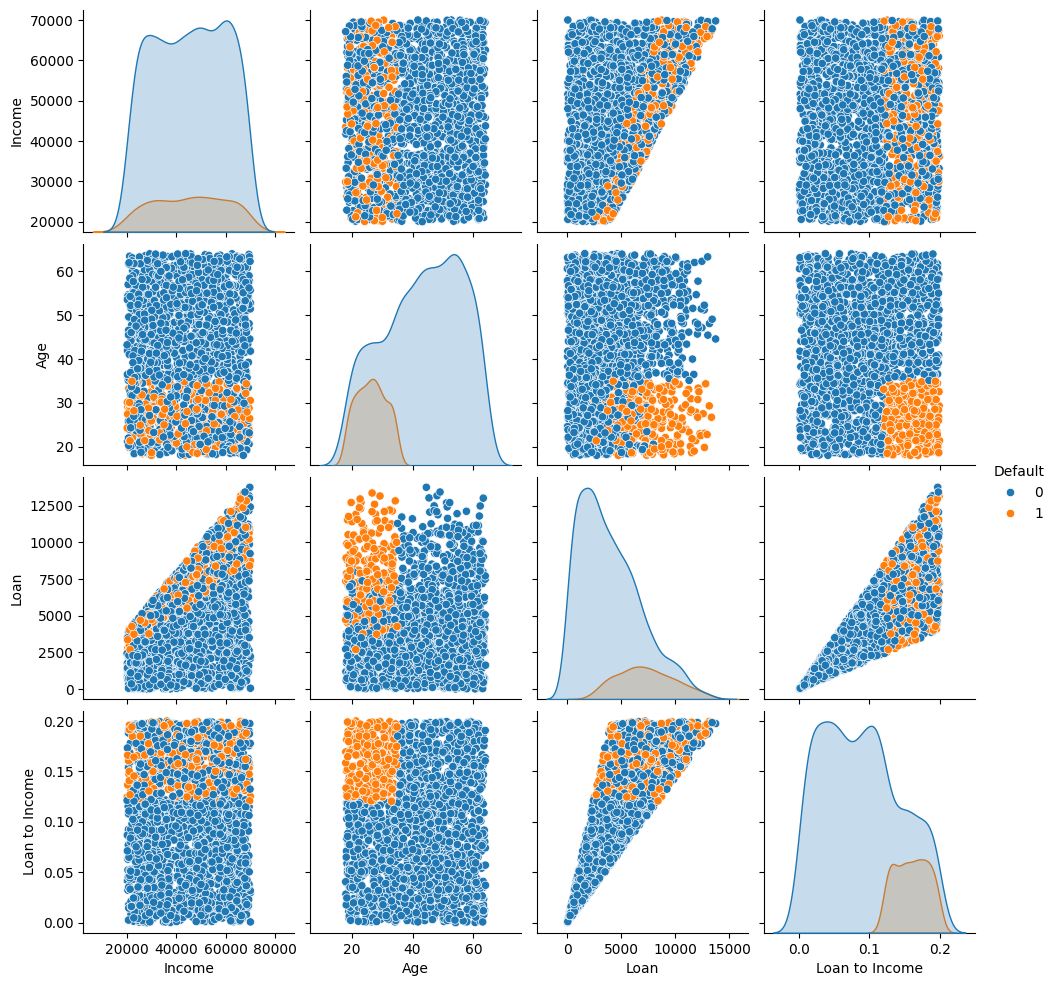

In [10]:
# Диаграммы попарного распределения
sns.pairplot(data, hue='Default', diag_kind='kde')
plt.show()

### Выводы:

- Клиенты с более высокими доходами, как правило, реже оказываются в дефолте.

- Дефолты наблюдаются в разных возрастных категориях, но, есть концентрация в определенных возрастном диапазоне 20-35 лет.

- Более высокие суммы займа часто связаны с дефолтами. Это может свидетельствовать о том, что крупные кредиты чаще приводят к финансовым проблемам


## Корреляционный анализ

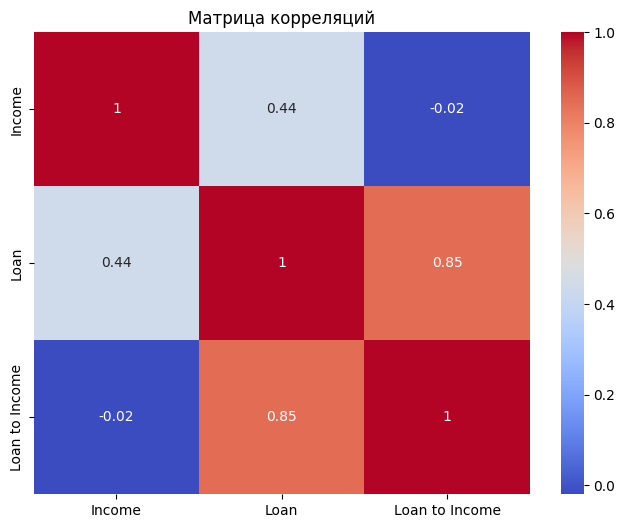

In [11]:
# Расчет матрицы корреляций
correlation_matrix = data[['Income', 'Loan', 'Loan to Income']].corr()

# Визуализация с помощью heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

### Выводы:
- Income и Loan имеют положительную корреляцию (0.44), что говорит о том, что с ростом дохода может увеличиваться и сумма предоставленного кредита.

- Loan и Loan to Income имеют высокую положительную корреляцию (0.85), что ожидаемо, поскольку отношение кредита к доходу напрямую связано с суммой кредита.

- Income и Loan to Income имеют слабую отрицательную корреляцию (-0.02), что говорит о том, что отношение кредита к доходу слабо связано с доходом клиента.

## Анализ баланса классов

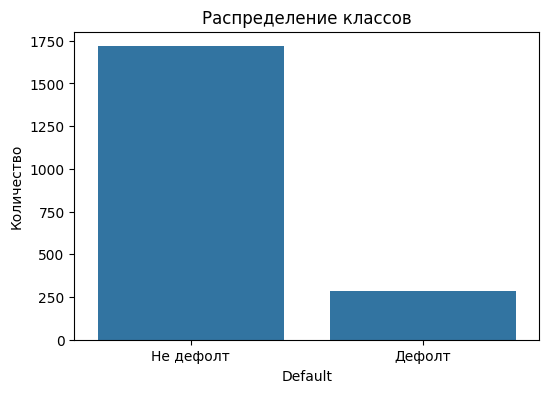

In [12]:
# Бар-чарт для распределения классов
class_distribution = data['Default'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Default')
plt.ylabel('Количество')
plt.title('Распределение классов')
plt.xticks([0, 1], ['Не дефолт', 'Дефолт'])
plt.show()

### Вывод:

Данные сильно несбалансированы: количество клиентов, не попавших в дефолт, значительно превышает количество клиентов в дефолте.